In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
oliv = datasets.fetch_olivetti_faces()

In [6]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [12]:
oliv['data'].shape

(400, 4096)

In [24]:
oliv['images'].shape



(400, 64, 64)

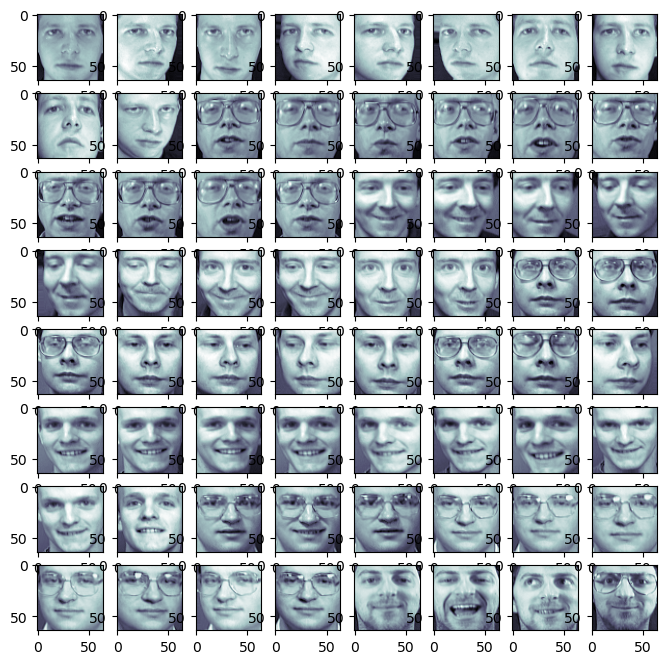

In [29]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(oliv.images[i],cmap=plt.cm.bone)
plt.show()

# Applying PCA on these images

In [30]:
x = oliv.data
y = oliv.target

In [31]:
pca = PCA()
pca.fit(x)

PCA()

In [32]:
pca.components_.shape

(400, 4096)

In [36]:
k = 0
total = sum(pca.explained_variance_)
currSum = 0

while currSum/total<0.95:
    currSum += pca.explained_variance_[k]
    k=k+1
k

123

In [70]:
pca = PCA(n_components=k,whiten=True)
transformed_data  = pca.fit_transform(x)
transformed_data.shape


(400, 123)

In [71]:
x_approx = pca.inverse_transform(transformed_data)
x_approx.shape


(400, 4096)

In [72]:
x_approx_images = x_approx.reshape((400,64,64))

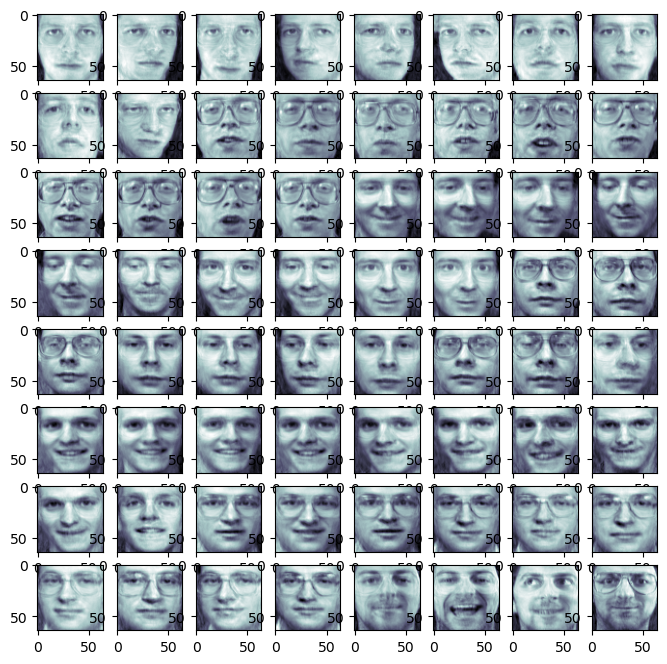

In [73]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(x_approx_images[i],cmap=plt.cm.bone)
plt.show()

# Eigen faces

In [74]:
eigenv = pca.components_
eigenv.shape


(123, 4096)

In [76]:
eigenfaces = eigenv.reshape((123,64,64))

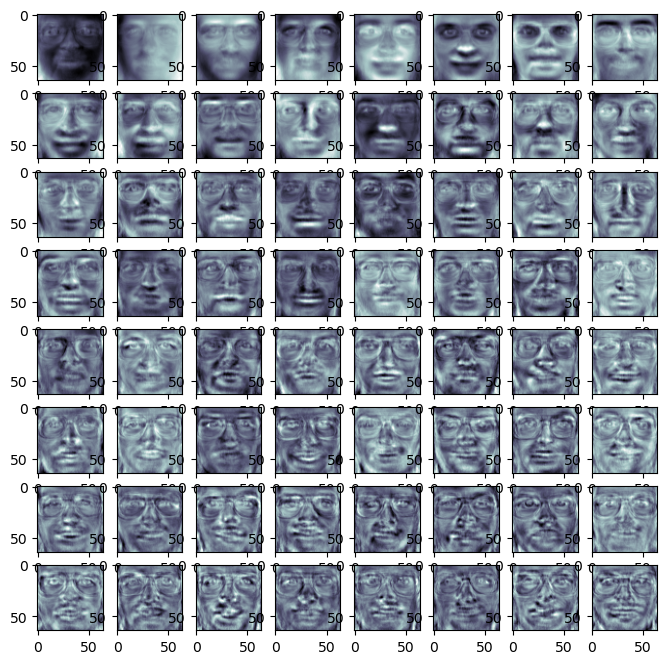

In [77]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i],cmap=plt.cm.bone)
plt.show()